## Hybrid recommendation system

### Collaborative/ User- based filtering:

The main idea behind these methods is to use other users’ preferences and taste to recommend new items to a user.


### Content / Item-Based filtering: 

Content based recommenders will instead use data exclusively about the items , items like name, genre , cast etc.


### Hybrid system: 

These includes the combination of collaborative filtering, content based and other possible approaches.

In [132]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


#ML model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
animes=pd.read_csv('anime data/anime.csv')
ratings= pd.read_csv('anime data/rating.csv')

In [134]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [135]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [136]:
#  check the shapes of the two data
print(animes.shape)
print("\n","*"*30)
print(ratings.shape)

(12294, 7)

 ******************************
(7813737, 3)


In [137]:
# check for missing values
print('Anime')
print(animes.isnull().sum())
print("\n","*"*30)
print('Ratings')
print(ratings.isnull().sum())

Anime
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

 ******************************
Ratings
user_id     0
anime_id    0
rating      0
dtype: int64


In [138]:

print('Anime')
print(animes.describe())
print("\n","*"*30)
print('Ratings')
print(ratings.describe())

Anime
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

 ******************************
Ratings
            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


 #### We will begin building the Hybrid recommendation system starting with the content based model

 ### Content based recommendation

For the content based we will be using genre

In [139]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [140]:
# replacing the null values with null string
animes['genre'] = animes['genre'].fillna('')

In [141]:
# lets see the most popular genre
genre_popularity = (animes.genre.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Hentai                   823
Comedy                   523
Music                    301
Kids                     199
Comedy, Slice of Life    179
Dementia                 137
Fantasy, Kids            128
Fantasy                  114
Comedy, Kids             112
Drama                    107
Name: genre, dtype: int64

(-0.5, 999.5, 399.5, -0.5)

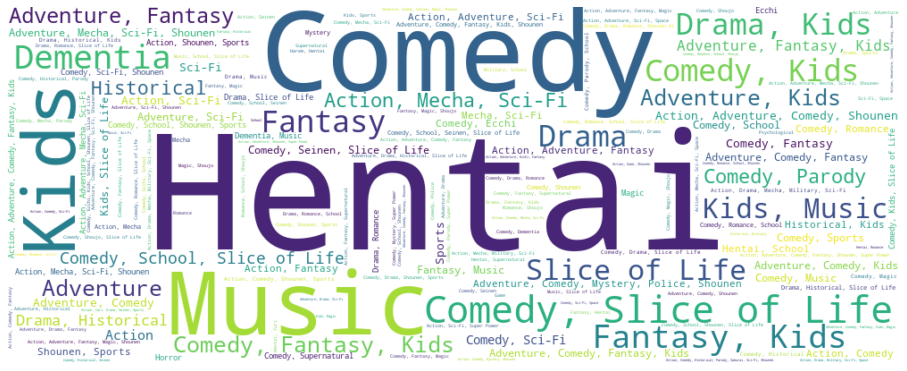

In [142]:
genre_view = WordCloud(width=1000,height=400, background_color='white')
genre_view.generate_from_frequencies(genre_popularity.to_dict())

plt.figure(figsize=(16, 8))
plt.imshow(genre_view, interpolation="bilinear")
plt.axis('off')

#### tf-idf vectorizer will help capture the important genres of each movie by giving a higher weight to the less frequent genres, which we woulnd't get with say, CountVectorizer .

In [143]:
# TfidfVectorizer calculates the frequency of the word with the consideration on how often it occurs in all documents
tf_idf = TfidfVectorizer(lowercase=True, stop_words = 'english')
tf_idf_matrix = tf_idf.fit_transform(animes['genre'])
tf_idf_matrix.shape

(12294, 46)

In [144]:
pd.DataFrame(tf_idf_matrix.todense(), columns=tf_idf.get_feature_names(), index=animes.name).sample(5, axis=1).sample(10, axis=0)

,school,yuri,historical,shounen,cars
name,,,,,
Kitty to Daniel no Odoru Santa-san no Himitsu,0.000000,0.0,0.0,0.000000,0.0
Hal,0.000000,0.0,0.0,0.000000,0.0
Roba Chotto Suneta,0.000000,0.0,0.0,0.000000,0.0
Yami Shibai,0.000000,0.0,0.0,0.000000,0.0
Iyashite Agerun Saiyuuki,0.000000,0.0,0.0,0.000000,0.0
Crayon Shin-chan Movie 03: Unkokusai no Yabou,0.394911,0.0,0.0,0.350133,0.0
Choco to Watashi,0.000000,0.0,0.0,0.000000,0.0
Jeremy no Ki,0.000000,0.0,0.0,0.000000,0.0
Fujimi 2-choume Koukyougakudan,0.000000,0.0,0.0,0.000000,0.0


#### Cosine similarity is a measure of similarity between two sequences of numbers.The sequences are viewed as vectors in an inner product space, and the cosine similarity is defined as the cosine of the angle between them.

In [145]:
# Cosine similarity equals to the cosine of the angle between the two vectors being compared
cosine_sim = cosine_similarity(tf_idf_matrix, tf_idf_matrix)
indices = pd.Series(animes.index, index=animes['name'])
indices = indices.drop_duplicates()

In [146]:
# creating a function that uses the cosine similarity to recommend based on genre
def recommendations (name, cosine_sim = cosine_sim):
    similarity = list(enumerate(cosine_sim[indices[name]]))
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity = similarity[1:11]
    anime_indices = [i[0] for i in similarity]
    result=animes[['anime_id','name','genre']].iloc[anime_indices]
    return result

In [147]:
recommendations('Dragon Ball GT')

,anime_id,name,genre
2184,893,Dragon Ball Movie 4: Saikyou e no Michi,"Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh..."
3052,892,Dragon Ball Movie 3: Makafushigi Daibouken,"Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh..."
3289,891,Dragon Ball Movie 2: Majinjou no Nemuri Hime,"Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh..."
1105,11359,Dragon Ball Kai: Mirai ni Heiwa wo! Goku no Ta...,"Action, Comedy, Fantasy, Sci-Fi, Shounen, Supe..."
7714,112,Chou Henshin Cosprayers,"Action, Adventure, Comedy, Ecchi, Fantasy, Mag..."
3007,27509,Toaru Majutsu no Index 10th Anniversary PV,"Action, Comedy, Magic, Sci-Fi, Super Power"
2965,10592,Scryed Alteration I: Tao,"Action, Adventure, Sci-Fi, Shounen, Super Power"
3184,12223,Scryed Alteration II: Quan,"Action, Adventure, Sci-Fi, Shounen, Super Power"
3757,1599,Eat-Man &#039;98,"Action, Adventure, Sci-Fi, Shounen, Super Power"
4521,1704,Eat-Man,"Action, Adventure, Sci-Fi, Shounen, Super Power"


There is a noticeable similarity in the recommended list , from names to genre 

### Collaborative filtering

we will be using other user's ratings 

In [148]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


-1 cannnot be a real rating so lets fill it with null values

In [149]:
ratings['rating'] = ratings['rating'].apply(lambda x: np.nan if x==-1 else x)


<AxesSubplot:xlabel='rating', ylabel='count'>

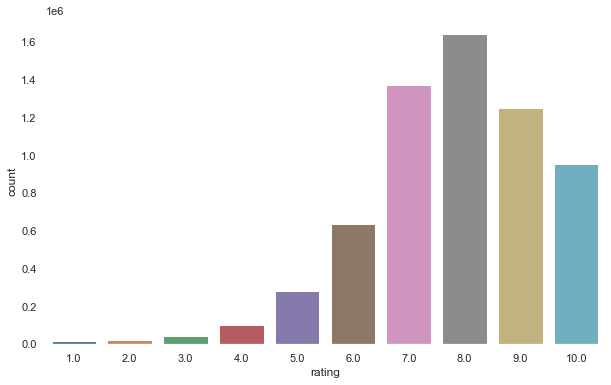

In [150]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.countplot(data=ratings, x='rating')

lets take a look at animes within ratings 1 to 5

In [151]:
anime = ratings.merge(animes, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])


In [152]:
anime[anime['rating_user'] <= 5][:20]

,user_id,anime_id,rating_user,name,genre,type,episodes,rating,members
27,99,20,5.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
35,125,20,4.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
73,234,20,5.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
90,271,20,1.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
92,273,20,5.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
114,332,20,5.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
135,382,20,5.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
151,417,20,3.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
175,492,20,5.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
208,572,20,4.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


I consider Naruto the goat , and seeing alot of abysmal ratings hurts, so i will be looking for people who rated it highly

but first , lets remove the low ratings cause we are concerned with good recommendations with high ratings

In [153]:
rating_scaled= ratings[(ratings['rating']>= ratings['rating'].quantile(0.045))]

<AxesSubplot:xlabel='rating', ylabel='count'>

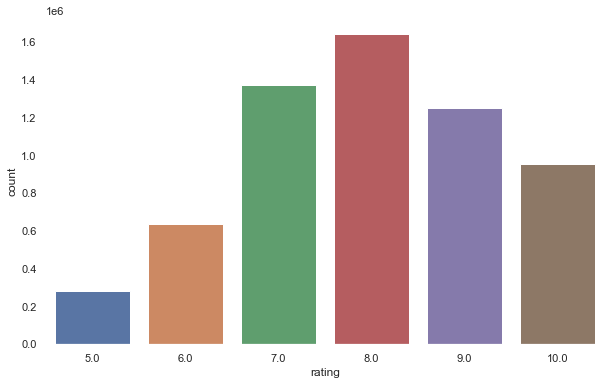

In [154]:
plt.figure(figsize=(10,6))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.countplot(data=rating_scaled, x='rating')

Also a bit skeptical about the 10 rating , a good rating is 8 

Lets use the Naruto anime_id to find similar people and buld our recommendation system

In [181]:
anime_id  = 20


naruto = animes[animes["anime_id"] == anime_id ]

In [182]:
naruto 

,anime_id,name,genre,type,episodes,rating,members
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [183]:
# lets find any one that watched Naruto liked it
similar_fans = ratings[(ratings["anime_id"] == anime_id) & (ratings["rating"] >= 8)]["user_id"].unique()

In [184]:
similar_fans

array([    3,    21,    28, ..., 73497, 73499, 73500], dtype=int64)

In [185]:
# Now we found their recommendations
similar_fans_rec = ratings[(ratings["user_id"].isin(similar_fans)) & (ratings["rating"] >= 8)]

In [186]:
# lets view the df
similar_fans_rec

,user_id,anime_id,rating
156,3,20,8.0
158,3,170,9.0
159,3,199,10.0
160,3,225,9.0
165,3,813,10.0
...,...,...,...
7812129,73500,30123,9.0
7812130,73500,30276,9.0
7812131,73500,31173,9.0
7812133,73500,31704,9.0


In [187]:
# we need the anime_id
similar_fans_rec = ratings[(ratings["user_id"].isin(similar_fans)) & (ratings["rating"] >= 8)]['anime_id']

In [188]:
# Lets be more critical and find a small percentage of animes that similar fans liked
similar_fans_rec=similar_fans_rec.value_counts() / len(similar_fans)

similar_fans_rec =similar_fans_rec[similar_fans_rec > .1]

In [189]:
similar_fans_rec

20       1.000000
1535     0.629219
16498    0.458628
5114     0.432893
1575     0.431800
           ...   
5530     0.101115
9041     0.100532
11843    0.100459
33       0.100313
4063     0.100095
Name: anime_id, Length: 184, dtype: float64

In [190]:
# lets search for anyone who has rated a movie that is in our set and also people who have rated them highly
all_users = ratings[(ratings["anime_id"].isin(similar_fans_rec.index)) & (ratings["rating"] >= 8)]

In [191]:
# lets find the percentage so we can use it to compare
all_user_recs = all_users["anime_id"].value_counts() / len(all_users["user_id"].unique())

In [192]:
all_user_recs

1535     0.443299
16498    0.323069
1575     0.321719
5114     0.307628
6547     0.285013
           ...   
13667    0.031138
6325     0.029022
8246     0.027491
936      0.026606
2144     0.025556
Name: anime_id, Length: 184, dtype: float64

In [193]:
rec_percentages = pd.concat([similar_fans_rec, all_user_recs], axis=1)
rec_percentages.columns = ["similar", "all"]

In [194]:
# so what we will be for is the weight in their difference
rec_percentages

,similar,all
1,0.177663,0.175933
6,0.146461,0.111946
20,1.000000,0.205840
30,0.176496,0.170381
33,0.100313,0.072345
...,...,...
28223,0.145294,0.108330
30276,0.223591,0.153634
30503,0.109937,0.070649
31043,0.142743,0.104743


In [195]:
rec_percentages["weight"] = rec_percentages["similar"] / rec_percentages["all"]

In [196]:
rec_percentages = rec_percentages.sort_values("weight", ascending=False)

In [197]:
# The higher the weight the better the recommendation
rec_percentages 

,similar,all,weight
20,1.000000,0.205840,4.858132
2144,0.101990,0.025556,3.990914
936,0.106146,0.026606,3.989532
6325,0.113217,0.029022,3.901075
2472,0.150470,0.039511,3.808274
...,...,...,...
2251,0.126121,0.124537,1.012721
1,0.177663,0.175933,1.009832
7311,0.105344,0.108660,0.969480
227,0.106000,0.114588,0.925056


In [198]:
# take our top ten recommendations and merge it with our movies data so we can see the titles of these movies
rec_percentages.head(10).merge(animes, left_index=True, right_on="anime_id")

,similar,all,weight,anime_id,name,genre,type,episodes,rating,members
841,1.000000,0.205840,4.858132,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3560,0.101990,0.025556,3.990914,2144,Naruto Movie 3: Dai Koufun! Mikazuki Jima no A...,"Action, Adventure",Movie,1,6.95,91526
3449,0.106146,0.026606,3.989532,936,Naruto Movie 2: Dai Gekitotsu! Maboroshi no Ch...,"Adventure, Comedy, Drama, Fantasy, Shounen, Su...",Movie,1,6.99,97308
1573,0.113217,0.029022,3.901075,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.50,83515
1827,0.150470,0.039511,3.808274,2472,Naruto: Shippuuden Movie 1,"Action, Adventure, Comedy, Fantasy, Shounen",Movie,1,7.43,108170
1828,0.130422,0.034289,3.803588,4437,Naruto: Shippuuden Movie 2 - Kizuna,"Action, Martial Arts, Shounen, Supernatural",Movie,1,7.43,97818
1472,0.103375,0.027491,3.760279,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.53,84527
2756,0.142451,0.038026,3.746168,442,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
784,0.108041,0.031138,3.469760,13667,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Martial Arts, Shounen, Supe...",Movie,1,7.84,87369
4444,0.122330,0.049686,2.462080,225,Dragon Ball GT,"Action, Adventure, Comedy, Fantasy, Magic, Sci...",TV,64,6.72,226625


In [199]:
def find_similar_animes(anime_id):
#     the first thing is to find users similar to us
    similar_fans = ratings[(ratings["anime_id"] == anime_id) & (ratings["rating"] >= 8)]["user_id"].unique()
    similar_fans_rec = ratings[(ratings["user_id"].isin(similar_fans)) & (ratings["rating"] >= 8)]["anime_id"]
    
#    adjusting it so that only 10% users recommended that anime  
    similar_fans_rec = similar_fans_rec.value_counts() / len(similar_fans)   
    similar_fans_rec = similar_fans_rec[similar_fans_rec > .1]
    
#   finding how common the recommendations are among  all of the users
    all_users = ratings[(ratings["anime_id"].isin(similar_fans_rec.index)) & (ratings["rating"] >= 8)]
    all_user_recs = all_users["anime_id"].value_counts() / len(all_users["user_id"].unique())
    rec_percentages = pd.concat([similar_fans_rec, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
#    then we find our score, sort it and return our merged score
    rec_percentages["weight"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("weight", ascending=False)
    return rec_percentages.head(10).merge(animes, left_index=True, right_on="anime_id")[[ "name", "genre"]]

### Hybrid recommendation system

Build an interactive text widget

In [176]:
import ipywidgets as widgets
from IPython.display import display

In [200]:
# input widget
anime_name_input = widgets.Text(
    value='Naruto',
    description='Anime name:',
    disabled=False
)
#  output widget
recommendation_list = widgets.Output()
# create ontype function
def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
#             search what is typed in using the previously created recommendation function
            results = recommendations(title)
#             then extract the anime_id taking the first row
            anime_id = results.iloc[0]["anime_id"]
            display(find_similar_animes(anime_id))
# observe our anime input
anime_name_input.observe(on_type, names='value')

display(anime_name_input, recommendation_list)

Text(value='Naruto', description='Anime name:')

Output()

These are the recommendations from the hybrid system , there still are similarities in regards the names of the recommended anime, but the genres are more diverse 